In [1]:
import networkx as nx
import numpy as np
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt
from queue import Queue
import time
from collections import defaultdict
plt.style.use(["science", "notebook", "grid"])

In [2]:
# Create the edge list
edge_list = np.random.randint(0, 100, size=(100, 2))

In [3]:
# Create a function for creating the adjacency hashmap
def create_adjacency_hashmap(edge_list):
    adj_hashmap = defaultdict(list)
    for edge in edge_list:
        adj_hashmap[edge[0]].append(edge[1])
        adj_hashmap[edge[1]].append(edge[0])
    return adj_hashmap

In [4]:
def bfs(graph, start_node, target_node, visited = None):
    q = Queue()
    path = []
    visited[start_node] = True
    q.put(start_node)
    path.append(start_node)
    while not q.empty():
        node = q.get()
        path.append(node)
        if node == target_node:
            return path
        for neighbour in graph[node]:
            if not visited[neighbour]:
                visited[neighbour] = True
                q.put(neighbour)
    return -1 # No path found

In [5]:
def visualize_search(graph, order, title, pos):
    plt.figure(figsize = (15, 8))
    plt.title(title, fontsize = 15, fontweight = "bold")
    visited = []
    for idx, node in enumerate(order):
        plt.clf()
        title = f"DFS, start = {node1}, target = {node2}, current node = {node}"
        plt.title(title, fontsize = 15, fontweight = "bold")
        visited.append(node)
        colors = []
        for n in graph.nodes:
            if n in visited:
                colors.append("r")
            else:
                colors.append("g")
        nx.draw(G, pos, with_labels = True,
                node_size=[v * 5 for v in graph.nodes()],
                node_color = colors)
        plt.draw()
        plt.pause(0.5)
    plt.show()
    time.sleep(1)

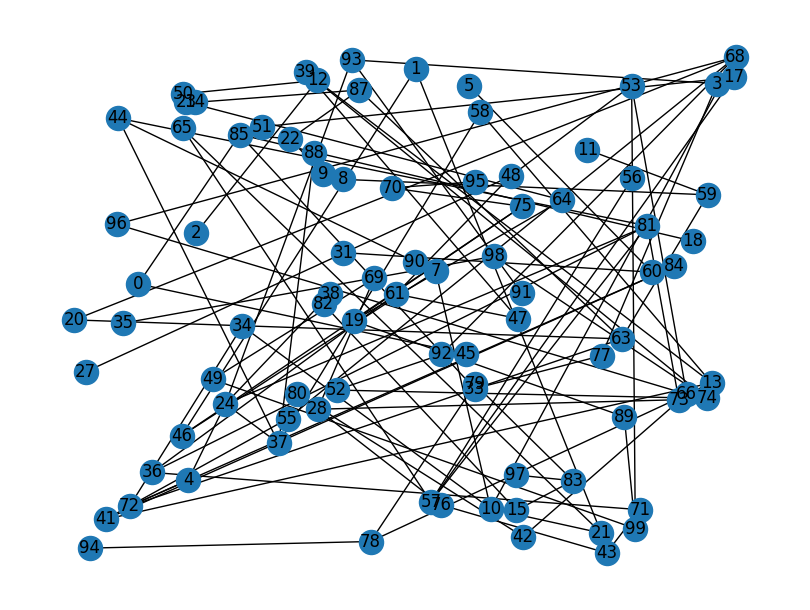

In [6]:
# Create the graph
G = nx.Graph()
# Add the edges to the graph
G.add_edges_from(edge_list)

# Show the graph
pos = nx.random_layout(G)
nx.draw(G, pos=pos, with_labels=True)

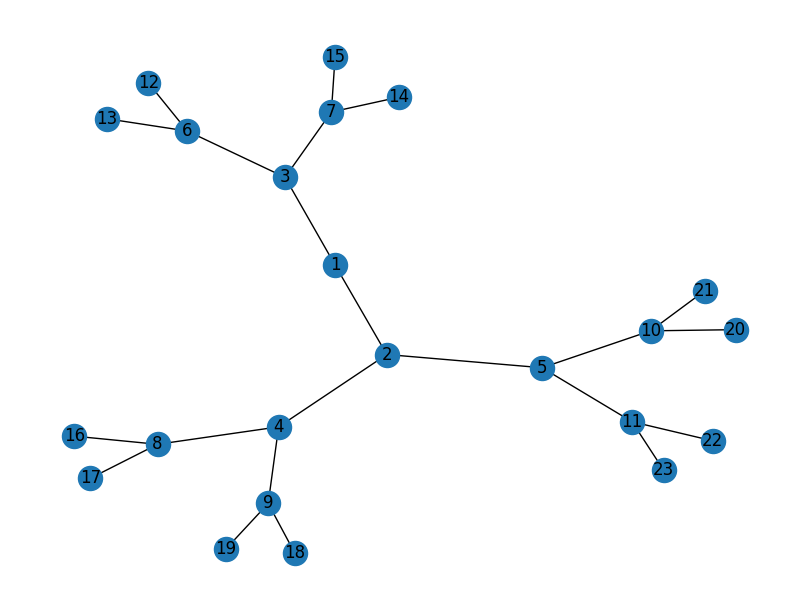

In [9]:
edge_hashmap = {
    1 : [2, 3], 
    2 : [1, 4, 5],
    3 : [1, 6, 7],
    4 : [2, 8, 9],
    5 : [2, 10, 11],
    6 : [3, 12, 13],
    7 : [3, 14, 15],
    8 : [4, 16, 17],
    9 : [4, 18, 19],
    10 : [5, 20, 21],
    11 : [5, 22, 23]}

# Create a graph from the adjacency hashmap
G = nx.Graph()
for node, neighbors in edge_hashmap.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True)
plt.show()

In [10]:
G

{0: array([0.7463147 , 0.98609835], dtype=float32),
 1: array([0.00483312, 0.23870833], dtype=float32),
 2: array([0.7235836 , 0.26384416], dtype=float32),
 3: array([0.6865902 , 0.11544082], dtype=float32),
 4: array([0.18218341, 0.90589887], dtype=float32),
 5: array([0.11733757, 0.783517  ], dtype=float32),
 6: array([0.6363734 , 0.30209568], dtype=float32),
 7: array([0.04107605, 0.4238306 ], dtype=float32),
 8: array([0.8579917 , 0.22974318], dtype=float32),
 9: array([0.9921286 , 0.06238115], dtype=float32),
 10: array([0.5966616 , 0.53155756], dtype=float32),
 11: array([0.73512053, 0.31955868], dtype=float32),
 12: array([0.24789079, 0.15435684], dtype=float32),
 13: array([0.30599472, 0.3403059 ], dtype=float32),
 14: array([0.96508557, 0.94884014], dtype=float32),
 15: array([0.54957014, 0.97273564], dtype=float32),
 16: array([0.68921757, 0.14960527], dtype=float32),
 17: array([0.41070864, 0.01207278], dtype=float32),
 18: array([0.48021755, 0.41317093], dtype=float32),
 19

In [50]:
M = (1/3) * np.array([[1, -2, -2], 
              [-2, 1, -2],
              [-2, -2, 1]])

eigenvals, eigenvects = np.linalg.eig(M)
print("Eigenvalues =  ", eigenvals)
print(f"Inverse of M = \n{np.linalg.inv(M)}")
print(f'Is inverse close to M = \n {np.isclose(np.linalg.inv(M), M)}')

Eigenvalues =   [ 1. -1.  1.]
Inverse of M = 
[[ 0.33333333 -0.66666667 -0.66666667]
 [-0.66666667  0.33333333 -0.66666667]
 [-0.66666667 -0.66666667  0.33333333]]
Is inverse close to M = 
 [[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
